In [0]:
import tensorflow as tf
import keras 
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
mnist=input_data.read_data_sets("MNIST_data")
import numpy as np

## Generator with 2 hidden layers
def generator(z,reuse=None):
    with tf.variable_scope('gen',reuse=reuse):
        hidden1=tf.layers.dense(inputs=z,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        hidden3=tf.layers.dense(inputs=hidden2,units=128,activation=tf.nn.leaky_relu)
        output=tf.layers.dense(inputs=hidden3,units=784,activation=tf.nn.tanh)
        
        return output
      
## Discriminator with 2 hidden layers
def discriminator(X,reuse=None):
    with tf.variable_scope('dis',reuse=reuse):
        hidden1=tf.layers.dense(inputs=X,units=128,activation=tf.nn.leaky_relu)
        hidden2=tf.layers.dense(inputs=hidden1,units=128,activation=tf.nn.leaky_relu)
        logits=tf.layers.dense(hidden2,units=1)
        output=tf.sigmoid(logits)
        
        return output,logits
      
tf.reset_default_graph()

real_images=tf.placeholder(tf.float32,shape=[None,784])
z=tf.placeholder(tf.float32,shape=[None,100])

G=generator(z)
D_output_real,D_logits_real=discriminator(real_images)
D_output_fake,D_logits_fake=discriminator(G,reuse=True)

def loss_func(logits_in,labels_in):
    return tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logits_in,labels=labels_in))

D_real_loss=loss_func(D_logits_real,tf.ones_like(D_logits_real)*0.9) #Smoothing for generalization
D_fake_loss=loss_func(D_logits_fake,tf.zeros_like(D_logits_real))
D_loss=D_real_loss+D_fake_loss

G_loss= loss_func(D_logits_fake,tf.ones_like(D_logits_fake))

lr=0.0001

#Do this when multiple networks interact with each other
tvars=tf.trainable_variables()  #returns all variables created(the two variable scopes) and makes trainable true
d_vars=[var for var in tvars if 'dis' in var.name]
g_vars=[var for var in tvars if 'gen' in var.name]

D_trainer=tf.train.AdamOptimizer(lr).minimize(D_loss,var_list=d_vars)
G_trainer=tf.train.AdamOptimizer(lr).minimize(G_loss,var_list=g_vars)

batch_size=500
epochs=1000
init=tf.global_variables_initializer()

samples=[] #generator examples

with tf.Session() as sess:
    sess.run(init)
    for epoch in range(epochs):
        num_batches=mnist.train.num_examples//batch_size
        for i in range(num_batches):
            batch=mnist.train.next_batch(batch_size)
            batch_images=batch[0].reshape((batch_size,784))
            batch_images=batch_images*2-1
            batch_z=np.random.uniform(-1,1,size=(batch_size,100))
            _=sess.run(D_trainer,feed_dict={real_images:batch_images,z:batch_z})
            _=sess.run(G_trainer,feed_dict={z:batch_z})
            
        print("on epoch{}".format(epoch))
        
        sample_z=np.random.uniform(-1,1,size=(1,100))
        gen_sample=sess.run(generator(z,reuse=True),feed_dict={z:sample_z})
        
        samples.append(gen_sample)

plt.imshow(samples[0].reshape(28,28))
plt.imshow(samples[epochs-1].reshape(28,28))


Using TensorFlow backend.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
on epoch0
on epoch1
on epoch2
on epoch3

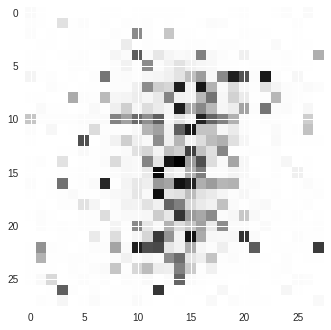

In [3]:
plt.imshow(samples[epochs-1].reshape(28,28))